In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#load the data

df=pd.read_csv('/kaggle/input/irisdata/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
122,6.7,3.0,5.2,2.3,Iris-virginica
123,6.3,2.5,5.0,1.9,Iris-virginica
124,6.5,3.0,5.2,2.0,Iris-virginica
125,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Analyze and visualize the data

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,127.00000,127.000000,127.000000,127.000000
mean,5.81811,3.052756,3.699213,1.164567
std,0.83594,0.448069,1.802357,0.765893
min,4.30000,2.000000,1.000000,0.100000
25%,5.10000,2.800000,1.500000,0.300000
50%,5.70000,3.000000,4.200000,1.300000
75%,6.35000,3.400000,5.100000,1.800000
max,7.90000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  127 non-null    float64
 1   sepal_width   127 non-null    float64
 2   petal_length  127 non-null    float64
 3   petal_width   127 non-null    float64
 4   species       127 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.1+ KB


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

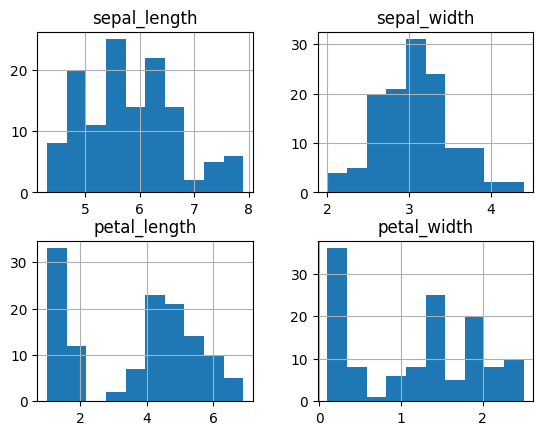

In [ ]:
df.hist()

In [ ]:
from sklearn.preprocessing import StandardScaler
df_s = df.copy()
std_scaler = StandardScaler()
df_s.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(df_s.iloc[:, [0, 1, 2, 3]])
df_s.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.862447,1.002111,-1.280722,-1.26439,Iris-setosa
1,-1.102646,-0.118207,-1.280722,-1.26439,Iris-setosa
2,-1.342845,0.329920,-1.336425,-1.26439,Iris-setosa
3,-1.462945,0.105857,-1.225019,-1.26439,Iris-setosa
4,-0.982546,1.226175,-1.280722,-1.26439,Iris-setosa


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_n = df.copy()
min_max_scaler = MinMaxScaler()
df_n.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(df_n.iloc[:, [0, 1, 2, 3]])
df_n.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='sepal_length', ylabel='Density'>

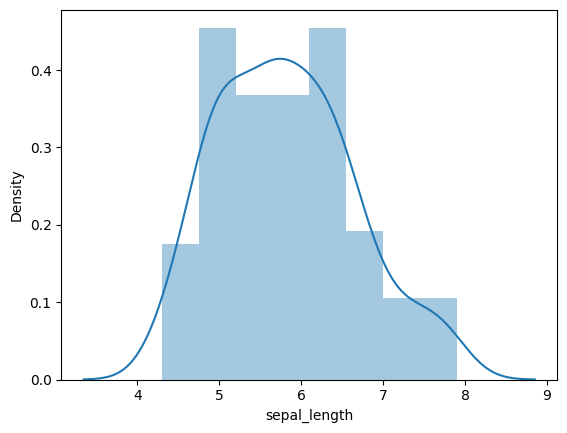

In [ ]:
sns.distplot(df["sepal_length"])

<Axes: xlabel='sepal_width', ylabel='Density'>

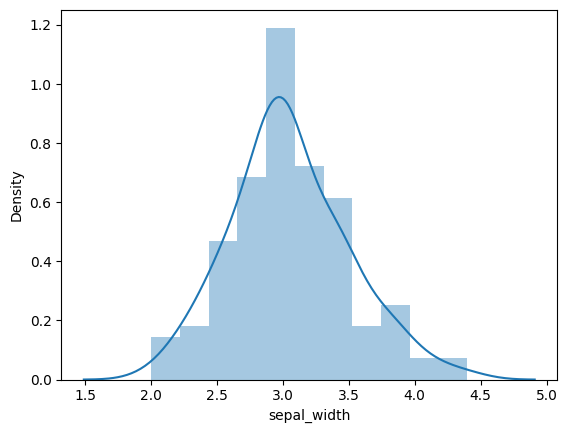

In [ ]:
sns.distplot(df["sepal_width"])

<Axes: xlabel='petal_length', ylabel='Density'>

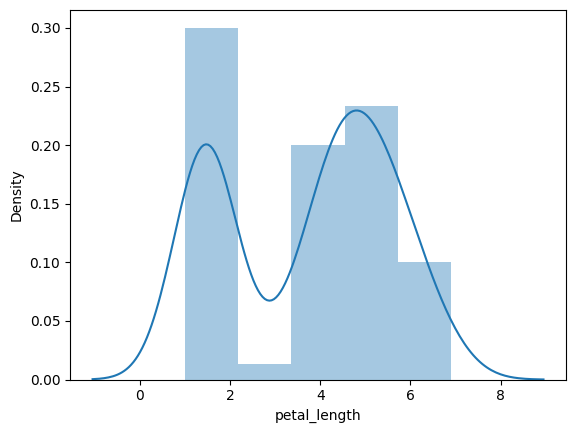

In [ ]:
sns.distplot(df["petal_length"])

<Axes: xlabel='petal_width', ylabel='Density'>

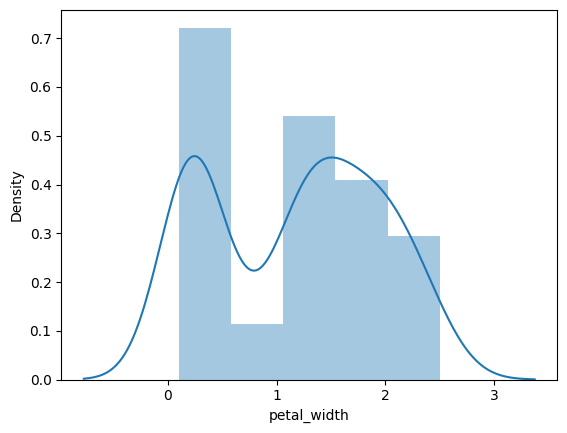

In [ ]:
sns.distplot(df["petal_width"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
c1 = ['species' ]
L = LabelEncoder()
for i in c1:
    df[i] = L.fit_transform(df[i])

In [ ]:
col=['sepal_length','sepal_width','petal_length','petal_width']

<Axes: >

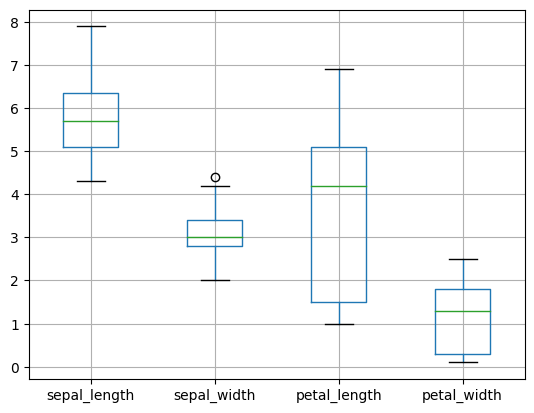

In [ ]:
df.boxplot(col)


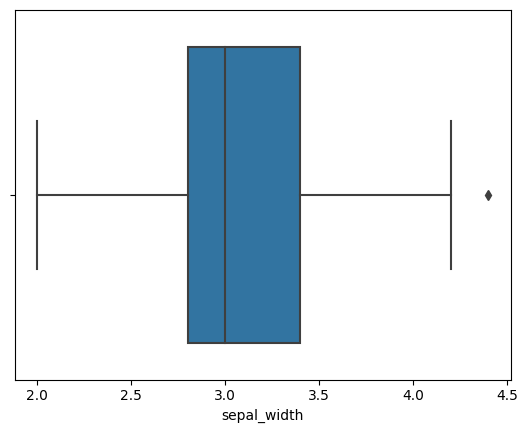

In [ ]:
sns.boxplot(x='sepal_width' ,data=df)
plt.show()

In [ ]:
#Remove outliers

q1=df['sepal_width'].quantile(0.25)
q3=df['sepal_width'].quantile(0.75)

print("The value of q1 : ",q1)
print("The value of q3 : ",q3)

The value of q1 :  2.8
The value of q3 :  3.4


In [ ]:
iqr = q3 - q1
print("iqr : ",iqr)

iqr :  0.6000000000000001


In [ ]:
upper=q1-1.5*iqr
lower=q3+1.5*iqr

print("The value of upper bound is : ",round(upper))
print("The value of lower bound is : ",round(lower))

The value of upper bound is :  2
The value of lower bound is :  4


In [ ]:
old_len=len(df)
print("Number of records befor outliers : ",old_len)

Number of records befor outliers :  127


In [ ]:
df.loc[~((df['sepal_width']<(upper)) | (df['sepal_width']>(lower)))]


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
122,6.7,3.0,5.2,2.3,2
123,6.3,2.5,5.0,1.9,2
124,6.5,3.0,5.2,2.0,2
125,6.2,3.4,5.4,2.3,2


In [ ]:
df=df.loc[~((df['sepal_width']<(upper)) | (df['sepal_width']>(lower)))]
print("Number of records befor outliers : ",old_len)
print("Number of records after outliers : ",len(df))
print("Outliers : ",old_len-len(df))

Number of records befor outliers :  127
Number of records after outliers :  126
Outliers :  1


<Axes: >

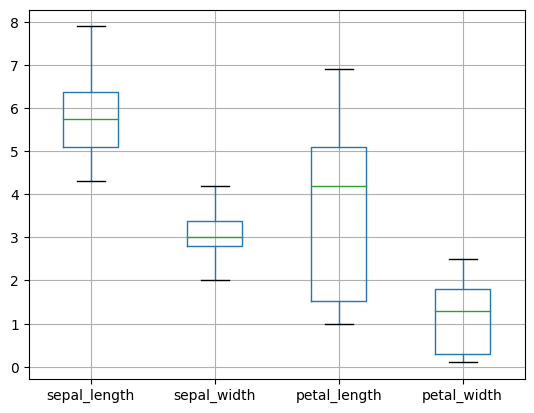

In [ ]:
df.boxplot(col)


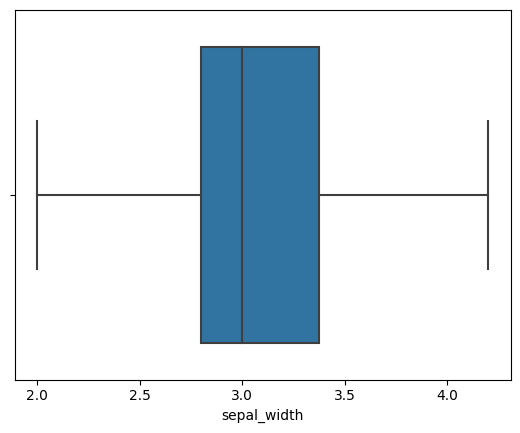

In [ ]:
sns.boxplot(x='sepal_width' ,data=df)
plt.show()

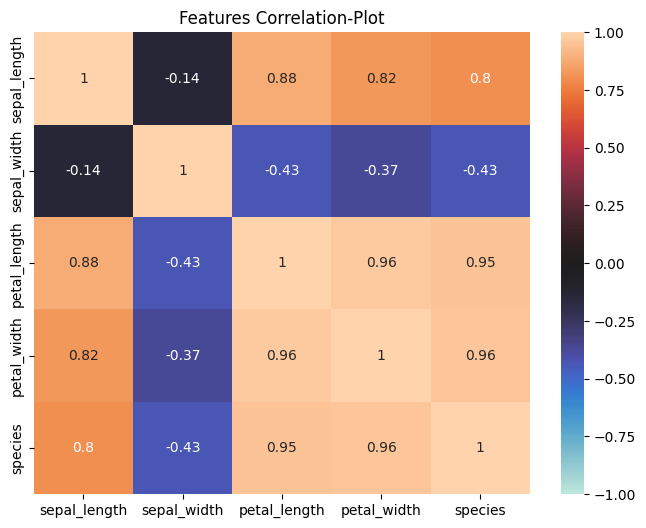

In [ ]:
features = df.columns
plt.figure(figsize=[8,6])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #,
plt.show()

In [ ]:
#Separate features and target

X = df.drop(columns=['species'],axis=1)
y = df['species']

In [ ]:
#Model training
#Split the data to train and test
from sklearn.metrics import classification_report,accuracy_score ,auc,roc_curve ,roc_auc_score
from sklearn.model_selection import train_test_split , GridSearchCV
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size= 0.3 , random_state = 50)

In [ ]:
#Support vector machine algorithm

from sklearn.svm import SVC
SV = SVC(C=10,kernel='rbf')
SV.fit(X_train,y_train)

SVC(C=10)

In [ ]:
#Model evaluation

y_pred=SV.predict(X_test)
print(y_pred)

[0 0 0 0 1 1 0 2 1 2 1 0 1 0 0 2 2 1 0 1 0 0 2 0 0 1 1 1 2 2 0 0 2 2 0 2 1
 1]


In [ ]:
SV.score(X_train,y_train)

0.9772727272727273

In [ ]:
SV.score(X_test,y_test)

1.0

In [ ]:
acc=accuracy_score(y_test,y_pred)
print(acc)

1.0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
param_grid  = {'C' : [0.1,1,10,100] , 'gamma': [1,0.1,0.01,0.001,0.0001] ,'gamma' : ['scale','auto'],'kernel' : ['rbf' ,'linear']}
grid = GridSearchCV(SVC() , param_grid  , return_train_score = True , verbose = 3 , n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, verbose=3)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00531592, 0.00364466, 0.00431356, 0.00486941, 0.00495806,
        0.0037148 , 0.00388126, 0.00375857, 0.00440745, 0.0037497 ,
        0.00379028, 0.00499835, 0.00372796, 0.00367942, 0.00383983,
        0.00352416]),
 'std_fit_time': array([4.99603538e-04, 1.71508151e-04, 6.18364306e-04, 1.97888539e-03,
        2.28911701e-03, 9.93747400e-05, 1.78572963e-04, 1.15955150e-04,
        9.37747977e-04, 7.73524233e-05, 7.33679633e-05, 1.91273379e-03,
        7.98858656e-05, 1.10268590e-04, 7.44715392e-04, 5.53219221e-04]),
 'mean_score_time': array([0.00305696, 0.00261121, 0.00298667, 0.00418944, 0.00450206,
        0.0029067 , 0.00350709, 0.00296082, 0.00579777, 0.00304799,
        0.00290647, 0.00279427, 0.00287395, 0.00282178, 0.00282245,
        0.00278654]),
 'std_score_time': array([1.30375982e-04, 6.00391572e-05, 2.71243024e-04, 2.63318068e-03,
        3.18480769e-03, 9.56942917e-05, 1.27468199e-03, 1.34363844e-04,
        5.65499618e-03, 3.76018993e-04, 6.20

In [ ]:
print(grid.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
grid_prediction=grid.predict(X_test)
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91        12
           2       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



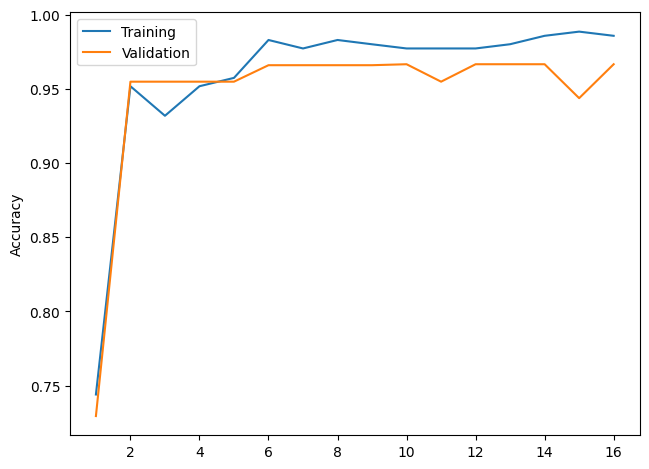

In [ ]:
plt.plot(np.arange(1,17), grid.cv_results_['mean_train_score'], label='Training')
plt.plot(np.arange(1,17), grid.cv_results_['mean_test_score'], label='Validation')
plt.tight_layout()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SV,X,y,cv=5)
scores

array([0.96153846, 0.96      , 0.92      , 1.        , 0.96      ])

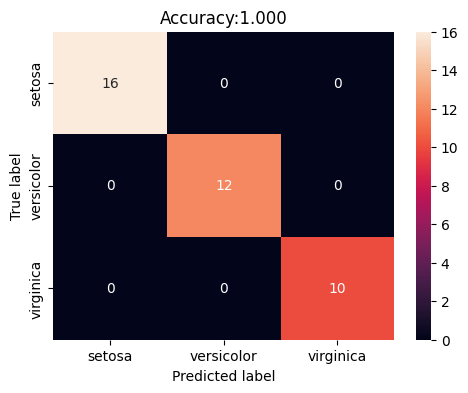

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

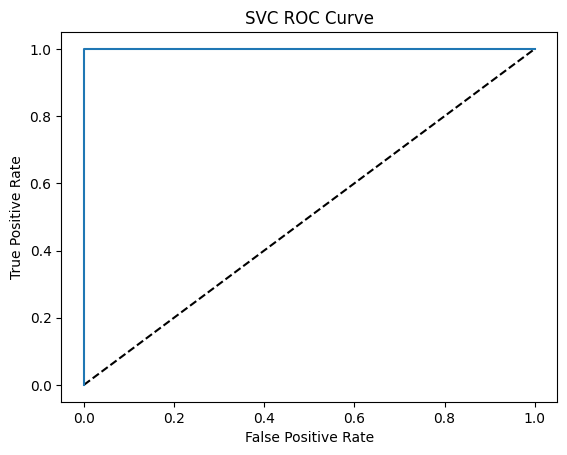

In [ ]:

fpr,tpr, thresholds = roc_curve(y_test , y_pred , pos_label=2)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.show()

In [ ]:
#Hidden test set
td=pd.read_csv('/kaggle/input/iris-test-set/IRIS_test_hidden.csv')
td

,sepal_length,sepal_width,petal_length,petal_width
0,4.8,3.0,1.4,0.3
1,5.1,3.8,1.6,0.2
2,4.6,3.2,1.4,0.2
3,5.3,3.7,1.5,0.2
4,5.0,3.3,1.4,0.2
5,7.0,3.2,4.7,1.4
6,6.4,3.2,4.5,1.5
7,6.9,3.1,4.9,1.5
8,5.5,2.3,4.0,1.3
9,6.5,2.8,4.6,1.5


In [ ]:

td_s = td.copy()
std_scaler = StandardScaler()
td_s.iloc[:, [0, 1, 2, 3]] = std_scaler.fit_transform(td_s.iloc[:, [0, 1, 2, 3]])
td_s.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.538320,-0.177173,-1.793453,-1.510746
1,-1.148084,2.151382,-1.659960,-1.649735
2,-1.798477,0.404966,-1.793453,-1.649735
3,-0.887927,1.860312,-1.726706,-1.649735
4,-1.278163,0.696035,-1.793453,-1.649735


In [ ]:
td_n = td.copy()
min_max_scaler = MinMaxScaler()
td_n.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(td_n.iloc[:, [0, 1, 2, 3]])
td_n.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.083333,0.466667,0.000000,0.045455
1,0.208333,1.000000,0.044444,0.000000
2,0.000000,0.600000,0.000000,0.000000
3,0.291667,0.933333,0.022222,0.000000
4,0.166667,0.666667,0.000000,0.000000


In [ ]:
prediction=SV.predict(td)
print(prediction)

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


In [ ]:
prediction = pd.DataFrame(prediction)

In [ ]:
prediction.to_csv('prediction_DoaaSalem.csv' , index = False)

In [ ]:
prediction

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


[CV 3/5] END C=0.1, gamma=scale, kernel=rbf;, score=(train=0.714, test=0.667) total time=   0.0s
[CV 3/5] END C=0.1, gamma=auto, kernel=rbf;, score=(train=0.957, test=0.889) total time=   0.0s
[CV 2/5] END C=0.1, gamma=auto, kernel=linear;, score=(train=0.957, test=1.000) total time=   0.0s
[CV 5/5] END C=0.1, gamma=auto, kernel=linear;, score=(train=0.944, test=1.000) total time=   0.0s
[CV 4/5] END C=1, gamma=scale, kernel=rbf;, score=(train=0.944, test=0.941) total time=   0.0s
[CV 3/5] END C=1, gamma=scale, kernel=linear;, score=(train=1.000, test=0.944) total time=   0.0s
[CV 3/5] END C=1, gamma=auto, kernel=rbf;, score=(train=0.986, test=0.944) total time=   0.0s
[CV 4/5] END C=1, gamma=auto, kernel=rbf;, score=(train=0.972, test=0.941) total time=   0.0s
[CV 4/5] END C=1, gamma=auto, kernel=linear;, score=(train=0.972, test=0.941) total time=   0.0s
[CV 5/5] END C=1, gamma=auto, kernel=linear;, score=(train=0.972, test=1.000) total time=   0.0s
[CV 4/5] END C=10, gamma=scale, ke